# RANDOM FOREST REGRESSOR FOR ESTIMATING DELIVERY_TIME
### Importing Preprocessed dataset after data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'Cleaned_Dataset\clean_dataset_v1.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,50.0,3.5,12.0,4.0,30.0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,50.0,3.5,11.0,4.0,30.0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,50.0,3.6,99.0,30.0,65.0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,99.0,3.7,176.0,95.0,30.0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,99.0,3.2,521.0,235.0,65.0


# Frequency encoding

In [4]:
from feature_engine import categorical_encoders as ce

encoder = ce.CountFrequencyCategoricalEncoder(encoding_method = 'count',
                                             variables = ['Cuisines', 'Location'])
df_encoded = encoder.fit_transform(df)

In [5]:
df_encoded.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,584,1,200.0,50.0,3.5,12.0,4.0,30.0
1,ID_2882,366,61,100.0,50.0,3.5,11.0,4.0,30.0
2,ID_1595,459,3,150.0,50.0,3.6,99.0,30.0,65.0
3,ID_5929,791,16,250.0,99.0,3.7,176.0,95.0,30.0
4,ID_6123,457,14,200.0,99.0,3.2,521.0,235.0,65.0


In [6]:
final_df = df_encoded.drop(columns = ['Restaurant'])
final_df.head()

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,584,1,200.0,50.0,3.5,12.0,4.0,30.0
1,366,61,100.0,50.0,3.5,11.0,4.0,30.0
2,459,3,150.0,50.0,3.6,99.0,30.0,65.0
3,791,16,250.0,99.0,3.7,176.0,95.0,30.0
4,457,14,200.0,99.0,3.2,521.0,235.0,65.0


In [7]:
X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]

In [8]:
print(X.shape, y.shape)

(11094, 7) (11094,)


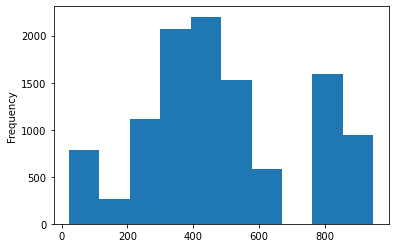

In [9]:
final_df['Location'].plot(kind = 'hist')

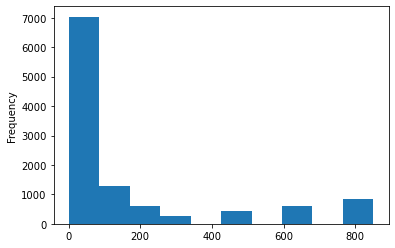

In [10]:
final_df.iloc[:, 1].plot(kind='hist')

### Neither of the Univariate plots seem to follow Normal Distribution, hence Linear Regression would not fit well

# Functions to implement Random Forest 

In [32]:
def TrainTestSplit(df):
    from sklearn.model_selection import train_test_split
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return train_test_split(X, y, test_size = 0.3, random_state = 7)

In [44]:
def PrintError(pred, test):
    errors = abs(pred - test)
    print('Mean Absolute Error: ', round(np.mean(errors), 2))
    
    mape = 100 * errors/test
    accuracy = 100 - np.mean(mape)
    print('Accuracy :', round(accuracy, 2))

In [64]:
def RandomForest(df):
    from sklearn.ensemble import RandomForestRegressor
    X_train, X_test, y_train, y_test = TrainTestSplit(df)

    rf = RandomForestRegressor(n_estimators= 1800, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap= False, random_state = 7)
    rf.fit(X_train, y_train)
    
    # errors
    y_pred = rf.predict(X_test)
    PrintError(y_pred, y_test)
    
    return rf

In [62]:
final_df.head()

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,584,1,200.0,50.0,3.5,12.0,4.0,30.0
1,366,61,100.0,50.0,3.5,11.0,4.0,30.0
2,459,3,150.0,50.0,3.6,99.0,30.0,65.0
3,791,16,250.0,99.0,3.7,176.0,95.0,30.0
4,457,14,200.0,99.0,3.2,521.0,235.0,65.0


# Detecting Outliers

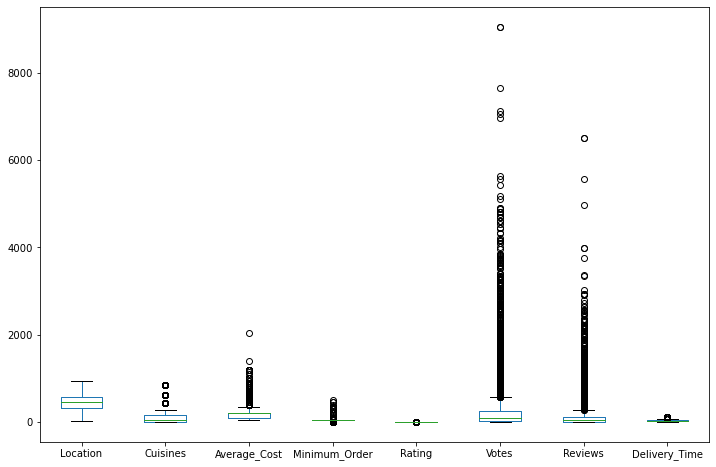

In [36]:
final_df.plot(kind='box', figsize = (12, 8))

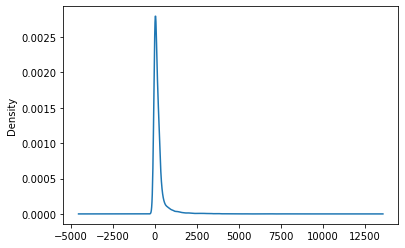

In [37]:
final_df['Votes'].plot(kind='density')

# IQR for Outlier Removal

In [38]:
q1 = final_df.quantile(0.25)
q3 = final_df.quantile(0.75)
iqr = q3 - q1
iqr

Location         258.000000
Cuisines         164.000000
Average_Cost     100.000000
Minimum_Order      0.000000
Rating             0.400000
Votes            222.870690
Reviews          110.674536
Delivery_Time     15.000000
dtype: float64

In [39]:
outlier_df = final_df[~((final_df < (q1 - 1.5*iqr)) | (final_df > (q3 + 1.5*iqr))).any(axis = 1)]
outlier_df.head()

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,584,1,200.0,50.0,3.5,12.0,4.0,30.0
1,366,61,100.0,50.0,3.5,11.0,4.0,30.0
2,459,3,150.0,50.0,3.6,99.0,30.0,65.0
5,457,66,150.0,50.0,3.8,46.0,18.0,30.0
6,459,53,150.0,50.0,3.7,108.0,31.0,30.0


In [40]:
len(outlier_df)

7054

Feature Importance in order of feature names: 


Text(0, 0.5, 'Feature Importance')

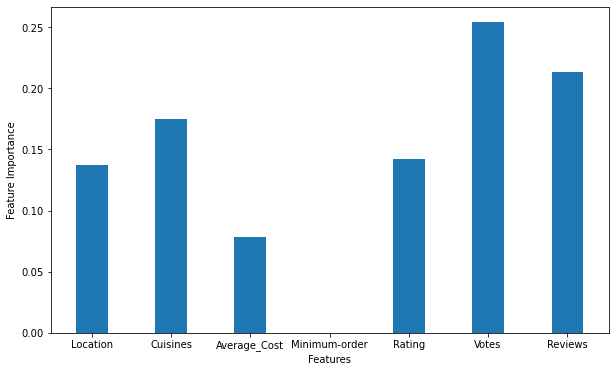

In [66]:
feature_names = ['Location', 'Cuisines', 'Average_Cost', 'Minimum-order', 'Rating', 'Votes', 'Reviews']
print('Feature Importance in order of feature names: ')
importances = list(rf.feature_importances_)

plt.figure(figsize = (10, 6))
plt.bar(feature_names, importances, width = 0.4)
plt.xlabel('Features')
plt.ylabel('Feature Importance')    

In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [56]:
X_train, X_test, y_train, y_test = TrainTestSplit(outlier_df)

In [57]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=7, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

# Model Testing 
### After applying randomized RandomizedSearchCV we have obtained the best set of parameters among the randomly chosen values of parameters (300 random values), we test our model on the test split dataset

In [86]:
rf = RandomForest(outlier_df)

Mean Absolute Error:  4.66
Accuracy : 88.01


In [68]:
test_df = pd.read_csv('test_dataset.csv')
test_df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",350.0,50.0,4.200000,361.000000,225.000000
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",100.0,50.0,3.674719,267.732955,129.087209
2,ID_4620,"Sector 1, Noida",Fast Food,100.0,50.0,3.600000,36.000000,16.000000
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",200.0,50.0,3.600000,66.000000,33.000000
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",150.0,50.0,2.900000,38.000000,14.000000


In [69]:
from feature_engine import categorical_encoders as ce

encoder = ce.CountFrequencyCategoricalEncoder(encoding_method = 'count',
                                             variables = ['Cuisines', 'Location'])
test_df = encoder.fit_transform(test_df)

In [70]:
test_df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,211,1,350.0,50.0,4.200000,361.000000,225.000000
1,ID_730,211,6,100.0,50.0,3.674719,267.732955,129.087209
2,ID_4620,199,119,100.0,50.0,3.600000,36.000000,16.000000
3,ID_5470,55,1,200.0,50.0,3.600000,66.000000,33.000000
4,ID_3249,199,23,150.0,50.0,2.900000,38.000000,14.000000


In [73]:
test_df = test_df.drop(columns = ['Restaurant'])

In [74]:
test_df.head()

,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,211,1,350.0,50.0,4.200000,361.000000,225.000000
1,211,6,100.0,50.0,3.674719,267.732955,129.087209
2,199,119,100.0,50.0,3.600000,36.000000,16.000000
3,55,1,200.0,50.0,3.600000,66.000000,33.000000
4,199,23,150.0,50.0,2.900000,38.000000,14.000000


In [77]:
X = test_df.values

In [78]:
test_pred = rf.predict(X)

In [79]:
test_pred

array([38.68611111, 35.12222222, 41.02777778, ..., 42.54722222,
       35.175     , 37.88194444])

In [81]:
x = pd.DataFrame(test_pred)

In [83]:
x.head()

,0
0,38.686111
1,35.122222
2,41.027778
3,36.283333
4,44.783333


In [85]:
x.to_csv('result_rf.csv')